<p style="text-align: center;"><strong>MACHINE LEARNING</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>GRUPO 203008067_3</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>FASE 4 - COMPONENTE PRACTICO - PRACTICAS SIMULADAS</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO POR: DARWIN RAUL MERCADO DIAZ</strong></p>
<p style="text-align: center;"><br /> </p>
<p style="text-align: center;"><strong>PRESENTADO A: EDGAR ANDRES VILLABON</strong></p>
<p style="text-align: center;"><br /> <br /> </p>
<p style="text-align: center;"><strong>UNIVERSIDAD ABIERTA Y A DISTANCIA UNAD</strong></p>
<p style="text-align: center;"><br /> <br /> <br /> </p>
<p style="text-align: center;"><strong>A&Ntilde;O 2023 II PERIODO 16-04</strong></p>
<p style="text-align: center;">&nbsp;</p>

# **INTRODUCCION**

Se desarrollará un modelo de machine learning que se conoce como K-means clustering, para poder seleccionar puntos de suspensión del servicio.

#**Acción 2: K-Means Clustering.**

## Se quiere elegir puntos de suspensión del servicio de acueducto. Para esto, se necesita:
1. Analizar las áreas desde donde se pide suspende el servicio con frecuencia.
2. Estudiar cuántas horas se deben se suspende el servicio del circuito.
3. Conocer las ubicaciones de las suspensiones del servicio dentro de todas estas
áreas para mantener la distancia mínima entre circuitos y los contratistas.
Use el método K-Means Clustering para resolver los anteriores problemas.

# **Desarrollo de la acción 2.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Se carga el conjunto de datos
df = pd.read_excel("Anexo 1 - evaluar las interrupciones del servicio de acueducto de EPM.xlsx", header = 1)

In [ ]:
df.head()

,Impacto,Circuito,Servicio,Motivo,Solicita,Número de instalación,Municipio,Dirección,Nombre del responsable,Fecha y hora esperada,Inicio,Fin,Horas,Estado,Fecha de registro,Explicación,Barrio,Nombre del contratista,Tipo de aviso
0,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1242,Medellín,De CR96B hasta CR99B entre CL48DD y CL 49,Claudia Marcela Toro,12/17/2018 11:30:00 AM,12/17/2018 09:00:00 AM,12/17/2018 11:30:00 AM,2.50,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1242 | Motivo: Manten...,JUAN XXIII - LA QUIEBRA,EPM.,IVR
1,Bajo,San Cristóbal,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,120,Medellín,De CR99B hasta CR100 entre CL48BB y CL 48D,Claudia Marcela Toro,12/17/2018 03:30:00 PM,12/17/2018 01:30:00 PM,12/17/2018 03:30:00 PM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 120 | Motivo: Manteni...,JUAN XXIII - LA QUIEBRA; EL SOCORRO,EPM.,Volantes
2,Bajo,Castilla-Bello,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1122,Bello,De CR57 hasta CR66B entre CL52 y CL 53,Claudia Marcela Toro,12/18/2018 11:00:00 AM,12/18/2018 09:00:00 AM,12/18/2018 11:00:00 AM,2.00,ABIERTA,12/10/2018 12:00:00 AM,Instalaciones afectadas: 1122 | Motivo: Manten...,ALTAVISTA (BELLO); EL CARMELO,EPM.,IVR
3,Bajo,Aguas Frías,Agua,Modernización,Unidad Operación y Mantenimiento Gestión Agua...,859,Medellín,De CR89DB hasta CR106 entre CL30 y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/06/2018 12:00:00 AM,Instalaciones afectadas: 859 | Motivo: Empalme...,LAS VIOLETAS,REDYCO S.A.S.,IVR
4,Bajo,Aguas Frías,Agua,Mantenimiento,Unidad Operación Mantenimiento Provisión Aguas,1564,Medellín,De CR100 hasta CR110 entre CL31A y CL 31F,Claudia Marcela Toro,12/18/2018 03:00:00 PM,12/18/2018 09:00:00 AM,12/18/2018 03:00:00 PM,6.00,ABIERTA,12/07/2018 12:00:00 AM,Instalaciones afectadas: 1564 | Motivo: Adecua...,SAN PABLO; LAS VIOLETAS,EPM,IVR


## **1. Analizar las áreas desde donde se pide suspende el servicio con frecuencia.**

In [ ]:
# Se definen las variables que se van a utilizar para desarrollar el modelo
df1 = df.copy()
df1 = df[['Circuito', 'Nombre del contratista ', 'Horas', 'Número de instalación', 'Barrio', "Nombre del contratista "]]

In [ ]:
# Se eliminan los datos nulos
df1= df1.dropna()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 960
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Circuito                 953 non-null    object
 1   Nombre del contratista   953 non-null    object
 2   Horas                    953 non-null    object
 3   Número de instalación    953 non-null    object
 4   Barrio                   953 non-null    object
 5   Nombre del contratista   953 non-null    object
dtypes: object(6)
memory usage: 52.1+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Se convierte la variable horas a una variable float que es el formato correcto
df1["Horas"] = df1["Horas"].astype(float)

In [ ]:
# Se define X y se usa OneHotEncoder para poder codificar los datos para poder ingresarlos a el modelo
encoder = OneHotEncoder()
X =encoder.fit_transform(df1[["Circuito", "Barrio","Horas"]])
X

<953x698 sparse matrix of type '<class 'numpy.float64'>'
	with 2859 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#Se crea el modelo y utilizamos 4 clusters gracias a la gráfica del codo que se realizo mas abajo
Kmeans = KMeans(n_clusters = 4 ,init="k-means++", n_init = 10, random_state = 42)
# Se ajusta el modelo Kmeans a los datos de X
Kmeans.fit(X)
# Se muestran los centroides
centroids = Kmeans.cluster_centers_
# Se muestra las predicciones para definir a qué cluster pertenece cada muestra en el conjunto de los datos X
labels = Kmeans.predict(X)

***En el siguiente bloque de código se realizará inicialmente una reducción de la dimensionalidad con la función TruncatedSVD del conjunto de datos, para así evitar la dispersión de los datos, permitiendo así un clustering más efectivo al mantener las características relevantes, luego se realizará el gráfico de los clusters para su analisis visual.***

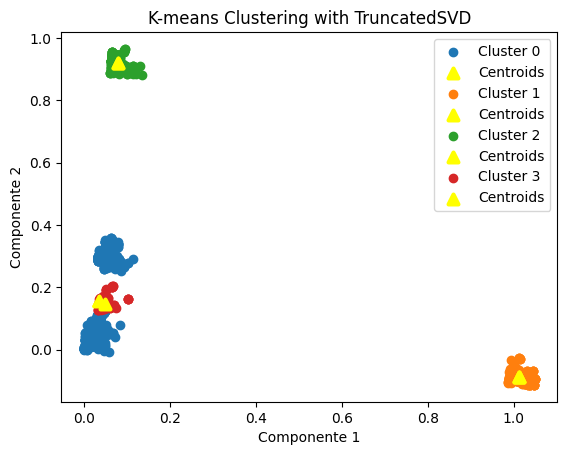

In [ ]:
# Aplicación de TruncatedSVD
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

svd = TruncatedSVD(n_components=2)
centroids1 = Kmeans.cluster_centers_
X_ = svd.fit_transform(X)

cent1 = svd.transform(centroids1)

df1["punto_1"] = labels

# Grafica de los clusters
for grafico in range(4):
    grafic_data = X_[df1["punto_1"] == grafico]
    plt.scatter(grafic_data[:, 0], grafic_data[:, 1], label=f"Cluster {grafico}")
    plt.scatter(cent1[:, 0], cent1[:, 1], marker='^', s=50, linewidths=3, color='yellow', label='Centroids')

plt.title("K-means Clustering with TruncatedSVD")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()

***Se puede observar claramente que tenemos 4 clusters diferentes en nuestro gráficos, los cuales contienen datos con similitudes entre ellos y se agruparon según la entrada inicial, teniendo así una gran diferencia entre algunas agrupaciones y otros están mas cercanos, dado que se observan datos que pueden estar cercanos el uno del otro, pero con similitudes diferentes.***

***En este bloque de codigo se mostrarán los labels y las predicciones iniciales en el dataset, con esto poder observar el comportamiento de los datos y adicional a esto se muestra la distorsión***

In [ ]:
print(f"Distorsión {Kmeans.inertia_}")
print(f"Miembros de clusters \n {Kmeans.labels_}")
print(f"Predicciones: \n {Kmeans.predict(X)}")

Distorsión 2356.076252316473
Miembros de clusters 
 [0 0 0 1 1 2 0 1 3 0 2 0 3 0 0 0 1 3 3 1 0 0 2 1 0 0 0 0 0 0 0 0 3 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 3 3 1 0 1 0 0 0 2 0 0 2 2 2 1 1 0 0 0 2 0 0 1 1 1 2
 0 0 2 3 0 3 3 0 0 0 0 2 0 0 2 2 2 2 0 2 3 1 0 0 0 2 0 0 0 3 2 0 3 1 0 0 0
 1 0 2 1 0 0 0 2 2 0 0 0 2 0 0 0 1 1 0 0 0 3 0 0 3 0 0 1 0 0 0 0 0 2 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 1 0 0 3 1 0 0 0 0 0 0 0 3 0 0
 0 3 0 0 0 0 0 0 0 2 3 0 0 3 1 0 0 3 3 0 3 3 3 3 3 0 0 3 1 0 0 1 3 3 0 0 1
 0 0 2 0 0 3 2 2 2 1 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 3 3 2 1 3 1
 0 0 0 1 1 3 3 2 2 0 2 0 1 0 1 2 0 3 0 0 1 0 0 3 3 2 0 1 1 2 0 0 0 0 0 0 1
 1 2 0 1 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 1 1 1 0 2 1 0 0 2 0 0 3 0 0 0 2 0 0
 1 3 1 1 0 0 0 2 1 1 0 3 0 3 0 3 0 0 1 2 0 3 2 0 0 1 0 3 1 1 0 0 0 0 0 1 3
 0 3 1 0 3 1 0 0 0 1 1 0 1 0 2 2 1 0 3 0 2 2 2 1 0 2 0 1 0 2 1 0 0 0 2 3 2
 0 0 0 3 3 0 0 0 0 1 3 0 0 0 0 0 3 0 0 0 0 2 0 1 0 1 2 3 3 3 2 0 1 0 2 1 0
 0 3 2 0 1 0 1 2 2 0 2 1 2 0 2 2 0 3 0 0 3 0 0 0

**Se visualiza la gráfica del codo para determinar el mejor numero de n_clusters y poder mejorar nuestros resultados**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

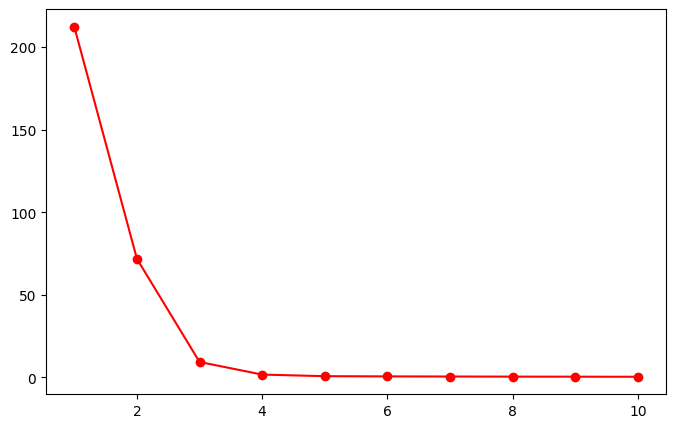

In [ ]:
ssd = []


for k in range(1,11):
  km= KMeans(n_clusters = k, random_state= 42)
  km.fit(X_)
  ssd.append(km.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(1,11),ssd, marker="o", linestyle = "-", color = "r")
plt.show()

***En este gráfico del codo se observa claramente que en n_clusters = 4 se estabiliza, por lo tanto se utilizó este número para realizar el modelo y obtener la mejor predicción.***

***Se procede a agrupar los datos de cada circuito a partir de los clusters obtenidos de kmeans.predict que fueron almacenados en la columna punto_1***

In [ ]:
punto_1 =df1.groupby("punto_1")[["Circuito"]].value_counts()
punto_1

punto_1  Circuito      
0        Volador Centro    40
         Bello             34
         Palenque          29
         América           13
         Itagüí            12
                           ..
3        Corazón            1
         Castilla-Bello     1
         Campo Valdés       1
         Campestre          1
         Volador Norte      1
Length: 270, dtype: int64

- ***Se puede observar en la agrupación usando la nueva columna que se obtuvo de el modelo con kmeans.predict, que  nos indica las áreas donde se están suspendiendo los servicios en los diferentes circuitos y la frecuencia, donde se tiene que el circuito del Volador Centro es donde se pide la suspención del circuito con más frecuencia***

##**2. Estudiar cuántas horas se deben se suspende el servicio del circuito.**

In [ ]:
df1["Horas"] = df1["Horas"].apply(float)

In [ ]:
# Se definen las variables de interés que se van a utilizar
X1 = encoder.fit_transform(df1[["Horas","Circuito"]])

***Desarrollo del modelo de Kmeans clustering***

In [ ]:
# Se definen los n_clusters que tendrá nuestro modelo Kmeans
Kmeans = KMeans(n_clusters = 4 ,init="k-means++", n_init = 10, random_state = 42)
# Se ajusta el modelo Kmeans a los datos de X
Kmeans.fit(X1)
# Se muestra las predicciones para definir a qué cluster pertenece cada muestra en el conjunto de los datos X
labels1 = Kmeans.predict(X1)
# Se mostrará la distorsión, los miembros de los clusters y sus predicciones
print(f"Distorsión {Kmeans.inertia_}")
print(f"Miembros de clusters \n {Kmeans.labels_}")
print(f"Predicciones: \n {Kmeans.predict(X1)}")

Distorsión 1405.3724435018278
Miembros de clusters 
 [0 0 0 3 3 2 1 3 0 0 2 0 0 1 0 0 3 0 0 3 0 0 2 3 1 0 0 0 0 0 0 0 0 0 0 0 3
 0 0 0 3 0 0 3 3 0 3 0 0 0 3 0 3 0 1 0 2 0 1 2 2 2 3 3 0 0 0 2 1 0 3 3 3 2
 0 0 2 0 0 0 0 0 0 0 0 2 0 1 2 2 2 2 0 2 0 3 0 1 0 2 0 0 0 0 2 0 0 3 0 0 0
 3 0 2 3 0 0 0 2 2 0 0 1 2 0 0 0 3 3 0 0 0 0 0 1 0 0 0 3 0 0 0 0 0 2 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 3 0 0 0 3 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 3 0 0 0 1 3
 0 1 2 1 1 0 2 2 2 3 1 0 1 0 1 2 0 0 0 0 3 1 0 0 1 0 3 3 3 0 0 0 0 2 3 0 3
 0 0 0 3 3 0 0 2 2 0 2 1 3 1 3 2 0 0 1 1 3 1 0 0 0 2 0 3 3 2 0 0 1 1 0 0 3
 3 2 0 3 0 0 0 0 0 2 0 1 0 2 0 0 0 0 2 3 3 3 0 2 3 1 0 2 1 1 0 0 1 1 2 0 0
 3 0 3 3 1 0 1 2 3 3 0 0 1 0 1 0 0 1 3 2 1 0 2 0 0 3 1 0 3 3 0 0 0 0 0 3 0
 0 0 3 1 0 3 0 0 0 3 3 0 3 0 2 2 3 0 0 0 2 2 2 3 0 2 0 3 0 2 3 0 1 0 2 0 2
 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 1 0 0 0 0 0 2 1 3 0 3 2 0 0 0 2 0 3 0 2 3 0
 0 0 2 0 3 0 3 2 2 1 2 3 2 0 2 2 1 0 0 1 0 0 0 

***Se define n_clusters = 4 dado que en la gráfica del codo presentada mas abajo fue donde se estabilizó la gráfica y es el número ideal para el desarrollo del modelo***

***En el siguiente bloque de código se utilizará nuevamente el metodo TruncatedSVD y se mostrarán los clusters que se obtienen***

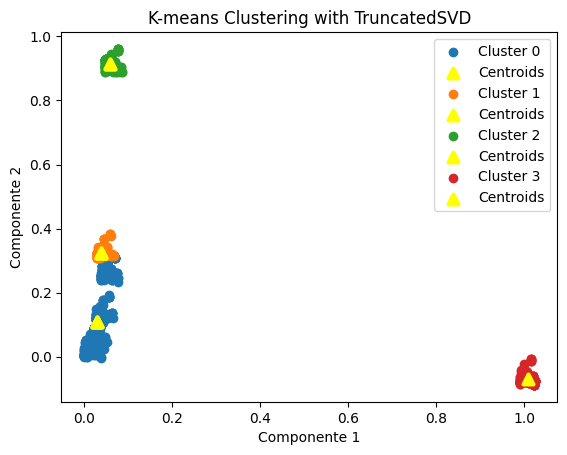

In [ ]:
svd = TruncatedSVD(n_components=2)
X_1 = svd.fit_transform(X1)

df1["punto_2"] = labels1

# Se muestran los centroides
centroids2 = Kmeans.cluster_centers_
cent2 = svd.transform(centroids2)

# Gráfico de los clusters
for grafico2 in range(4):
    grafic_data2 = X_1[df1["punto_2"] == grafico2]
    plt.scatter(grafic_data2[:, 0], grafic_data2[:, 1], label=f"Cluster {grafico2}")
    plt.scatter(cent2[:, 0], cent2[:, 1], marker='^', s=50, linewidths=3, color='yellow', label='Centroids')

plt.title("K-means Clustering with TruncatedSVD")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()

***Se visualiza claramente los 4 clusters que se muestran, cada uno con su centroide bien definido, indicanonos las similitudes que tienen cada clusters y su comportamiento gráfico***

***Se desarrolla el método del codo para definir el mejor número de n_clusters y mejorar los resultados***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

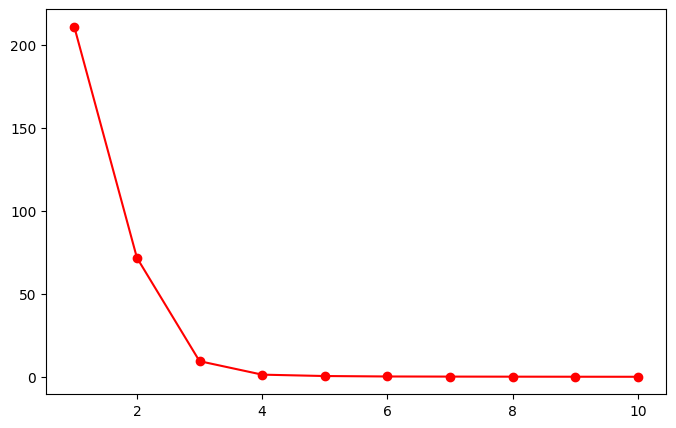

In [ ]:
ssd = []

for k in range(1,11):
  km= KMeans(n_clusters = k, random_state= 42)
  km.fit(X_1)
  ssd.append(km.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(1,11),ssd, marker="o", linestyle = "-", color = "r")
plt.show()

***Al analizar la gráfica del codo se puede ver que en n_clusters = 4 es el ideal, dado que es donde se estabiliza el gráfico***

In [ ]:
punto_2 =df1.groupby("punto_2")[["Circuito","Horas"]].value_counts()
punto_2

punto_2  Circuito        Horas
0        Volador Centro  9.0      14
         Bello           10.0     10
         Volador Centro  3.0       8
         La Tolda        8.0       8
         Volador Centro  8.0       8
                                  ..
3        Centro          6.0       1
         Campestre       6.0       1
         Belencito       6.0       1
         Barbosa         6.0       1
         Altavista Sur   6.0       1
Length: 473, dtype: int64

***En la representación anterior se pudo obtener cuantas horas se debe de suspender el servicio de cada circuito, la cuál fue una agrupación de los datos sobre la columna nueva punto 2 que contiene las predicciones de los clusters a los que pertenece cada uno de los datos mostrados.***

#**Punto 3. Conocer las ubicaciones de las suspensiones del servicio dentro de todas estas áreas para mantener la distancia mínima entre circuitos y los contratistas.**

In [ ]:
# Se definen las variables de interés que se van a utilizar
X2 = encoder.fit_transform(df1[["Circuito","Barrio","Nombre del contratista "]])

In [ ]:
#Se crea el modelo y utilizamos 3 clusters gracias a la gráfica del codo que se realizo mas abajo
Kmeans = KMeans(n_clusters = 3 ,init="k-means++", n_init = 10, random_state = 42)

# Se ajusta el modelo Kmeans a los datos de X
Kmeans.fit(X2)

# Se muestran los centroides
centroids3 = Kmeans.cluster_centers_
labels2 = Kmeans.predict(X2)
# Se mostrará la distorsión, los miembros de los clusters y sus predicciones
print(f"Distorsión {Kmeans.inertia_}")
print(f"Miembros de clusters \n {Kmeans.labels_}")
print(f"Predicciones: \n {Kmeans.predict(X2)}")

Distorsión 3025.336736683059
Miembros de clusters 
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1
 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 2 2 0 2 0 2
 2 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 2 0 2 0 2 2 2 0 0 2 0 0 0 2 2 2
 0 2 0 2 0 0 2 2 2 0 0 2 2 2 2 2 2 0 0 0 0 0 0 0

***Se usará nuevamente el método TruncatedSVD para reducción de dimensionalidad y se mostrará el gráfico de los clusters y sus centroides***

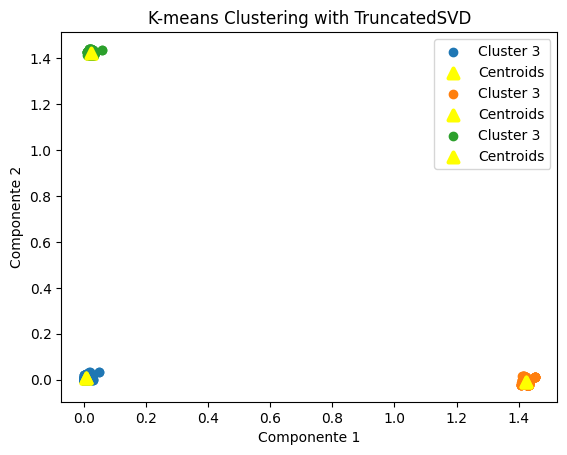

In [ ]:
svd = TruncatedSVD(n_components=2)
X_2 = svd.fit_transform(X2)

df1["punto_3"] = labels2
cent3 = svd.transform(centroids3)
# Gráfico de los clusters
for grafico3 in range(3):
    grafic_data3 = X_2[df1["punto_3"] == grafico3]
    plt.scatter(grafic_data3[:, 0], grafic_data3[:, 1], label=f"Cluster {grafico2}")
    plt.scatter(cent3[:, 0], cent3[:, 1], marker='^', s=50, linewidths=3, color='yellow', label='Centroids')

plt.title("K-means Clustering with TruncatedSVD")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend()
plt.show()

***Se puede observar claramente que n_clusters = 3 es el número ideal para esta representación gráfica, podemos mirar cada uno de los clusters que se desarrolla a partir de las caracteristicas similares y tienen una distancia bien determinada uno del otro, adicional a esto se muestran los centroides de manera efectiva en cada uno***

***Se muestra el gráfico del codo para determinar el mejor número de n_clusters***

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

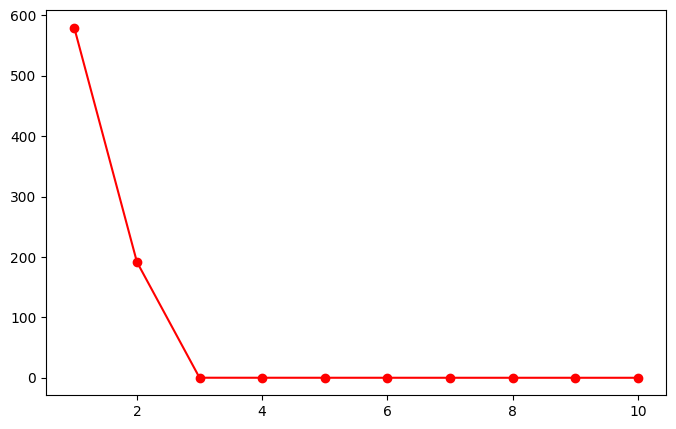

In [ ]:
ssd = []

for k in range(1,11):
  km= KMeans(n_clusters = k, random_state= 42)
  km.fit(X_2)
  ssd.append(km.inertia_)

plt.figure(figsize = (8,5))
plt.plot(range(1,11),ssd, marker="o", linestyle = "-", color = "r")
plt.show()

***Se puede observar que la cantidad ideal de n_clusters = 3, dado que es donde se estabiliza el gráfico del codo***

In [ ]:
punto_3 =df1.groupby("punto_3")[["Circuito","Nombre del contratista "]].value_counts()
print(punto_3)

punto_3  Circuito         Nombre del contratista               Nombre del contratista             
0        Volador Centro   Consorcio Redes Iguaná.              Consorcio Redes Iguaná.                14
         Palenque         CONSORCIO REDES IGUANÁ.              CONSORCIO REDES IGUANÁ.                14
                          Consorcio Redes Iguaná.              Consorcio Redes Iguaná.                11
         Volador Centro   CONSORCIO REDES IGUANÁ.              CONSORCIO REDES IGUANÁ.                11
         Bello            UT MEJIA ACEVEDO - S&E.              UT MEJIA ACEVEDO - S&E.                 7
                                                                                                      ..
2        Bello            Contratista: Ingeniería Total Ltda.  Contratista: Ingeniería Total Ltda.     1
         Batallón         Contratista: Ingeniería Total Ltda.  Contratista: Ingeniería Total Ltda.     1
         Aures 2          Contratista: Ingeniería Total Ltda.

***Se muestra las ubicaciones de las suspensiones dentro de las áreas y poder mantener la distancia minima entre circuitos y los contratistas***

# **CONCLUSIONES**

- Se pudo desarrollar los diferentes agrupamientos solicitados por parte del tutor, en los cuales se pudo visualizar gráficamente cada uno de los clusters obtenidos y sus centroides, que nos permiten entender gráficamente el comportamiento de los datos.

- Se aprendío a aplicar el modelo de K-Means Clustering para obtener los puntos de suspensión del servicio de acueducto segun el área, cuantas horas se va a suspender el servicio y los circuitos junto con los contratistas para poder tener en cuenta la distancia minima entre ellos

# **REFERENCIAS**

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt Publishing. (pp. 174-181). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1566405&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_174

- Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol. 2nd ed. Packt Publishing. (pp. 348-363). https://bibliotecavirtual.unad.edu.co/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=1606531&lang=es&site=eds-live&scope=site&ebv=EB&ppid=pp_348